# Churn Prediction Project

<p align="left">
  <img src="https://uruit.com/blog/wp-content/uploads/2020/11/Churn1-1024x724.jpg" width="600">
</p>

**Churn** is a phenomenon where customers stop using the services of a company. Therefore, churn prediction involves identifying customers who are most likely to terminate their contracts in the near future. If a company can do this, it can offer discounts or special deals on its services in order to retain those customers.

Of course, we can apply machine learning to this problem: using historical data about customers who have already left and building a model to identify current customers who are likely to leave. This is a **binary classification** task. The target variable we want to predict is categorical and has only two possible outcomes: **will leave** or **will not leave**.


## Project Context and Goals

Telecommunication company is experiencing a problem that some of their customers are churning and switch to competitors.  
Our aim is to develop a system to identify such users and offer them incentives that will encourage them to stay.  
  
We want to target these customers with our marketing messages and provide discounts. We would also like to understand why the model believes that certain customers are about to leave, and for that we need to be able to interpret its predictions.

We have collected a dataset that contains certain information about our customers: which services they used, how much they paid, and how long they stayed with us. We also know which customers terminated their contracts and stopped using our services (as a result of churn). We will use this information as the target variable in a machine learning model and predict it using all the other available information.

## Dataset


According to the description, the dataset contains the following information:

- **Customer services** — telephone service; multiple lines; Internet; technical support; and additional services such as online security, backup, device protection, and streaming TV;

- **Account information** — how long the customer has been with the company, contract type, and payment method;

- **Charges** — how much the customer paid for the last month and in total;

- **Demographic information** — gender, age, whether the customer has dependents or a partner;

- **Churn** — yes/no, whether the customer left the company during the last month.


## Packages

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


<a name = '1'></a>
## 1 - Preliminary Data Exploration and Modifications 


In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
display(df.head())
print(f"{len(df)} rows and {df.shape[1]} columns")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


7043 rows and 21 columns


#### Columns definition

- **CustomerID** — customer identifier;

- **Gender** — male/female;

- **SeniorCitizen** — whether the customer is a senior citizen (0/1);

- **Partner** — whether the customer lives with a partner (yes/no);

- **Dependents** — whether the customer has dependents (yes/no);

- **Tenure** — number of months since the contract started;

- **PhoneService** — whether the customer has phone service (yes/no);

- **MultipleLines** — whether the customer has multiple phone lines (yes/no/no phone service);

- **InternetService** — type of internet service (no/DSL/fiber optic);

- **OnlineSecurity** — whether online security is enabled (yes/no/no internet);

- **OnlineBackup** — whether online backup service is enabled (yes/no/no internet);

- **DeviceProtection** — whether device protection service is enabled (yes/no/no internet);

- **TechSupport** — whether the customer has technical support (yes/no/no internet);

- **StreamingTV** — whether streaming TV service is enabled (yes/no/no internet);

- **StreamingMovies** — whether streaming movie service is enabled (yes/no/no internet);

- **Contract** — type of contract (month-to-month/one year/two year);

- **PaperlessBilling** — whether paperless billing is enabled (yes/no);

- **PaymentMethod** — payment method (electronic check, mailed check, bank transfer, credit card);

- **MonthlyCharges** — monthly amount charged (numeric);

- **TotalCharges** — total amount charged (numeric);

- **Churn** — whether the customer terminated the contract (yes/no).


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# TotalCharges column identified as object we will change it to float type
total_charges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df[total_charges.isnull()][['customerID','TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


The reason why TotalCharges has been identified as an object data type because the column contains rows that contained space which we changed to "_"  

We will fill them with zeroes.

In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)


Now let's harmonize object columns and column names 

In [6]:
# Harmonize columns and strings inside 
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = df.select_dtypes(include='object').columns
string_columns
df[string_columns] = df[string_columns].apply(
    lambda s: s.str.lower().str.replace(' ', '_')
)


Next, let us turn to our target variable: **churn**. At the moment, it is categorical and takes two values: **yes** and **no**.

In the case of binary classification, most models usually expect numerical values: **0** for *no* and **1** for *yes*. Therefore, we will convert these values into numbers.


In [7]:
df.churn = (df.churn == 'yes').astype(int)

Now split our main data frame into train_full (which will be further split to train and validation frames) and test. 

In [8]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [9]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33,
     random_state=11)
y_train = df_train.churn.values 
y_val = df_val.churn.values
del df_train['churn'] 
del df_val['churn']

<a name = '2'></a>
## 2 - EDA

In [10]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [11]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [12]:
round(df_train_full.churn.mean(),3)

0.27

Our churn dataset is an example of a so-called **imbalanced dataset**. In our data, there are three times more people who did **not** churn than those who did. Therefore, we can say that the **non-churn** class dominates the **churn** class.

This is quite obvious: the churn rate in our data is **0.27**, which is a strong indicator of class imbalance.

Let us create two lists:
- **`categorical`** — which will contain the names of categorical variables;
- **`numerical`** — which will similarly contain the names of numerical variables.


In [13]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [14]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

It is convenient that categorical variables have few unique values. So that we don't have to spend more time preparing the data.  
  
Now we embark upon another important step of EDA which is how to understand importance of features.

<a name = '2.1'></a>
### 2.1 - Feature Importance

Understanding how other variables influence the target variable (churn) is the key to understanding the data and building a good model. This process is called **feature importance analysis**, and it is often performed as part of exploratory data analysis to determine which variables are useful for the model.

It also provides us with additional insights into the dataset and helps answer questions such as **“What causes customer churn?”** and **“What are the characteristics of customers who leave?”**


`Churn Rate`

Let us start by looking at the **categorical variables**. The first thing we can do is examine the **churn rate for each variable**.

We can look at all the distinct values of a variable. Each value corresponds to a group of customers — all customers who have that particular value. For each such group, we can calculate the churn rate, which is the **group-specific churn rate**.

Once we have it, we can compare it with the **global churn rate**, calculated across all observations in the dataset.

If the difference between the group churn rate and the global churn rate is small, then this value is not very important for predicting churn, since this group of customers does not really differ from the rest. On the other hand, if the difference is significant, then something within this group distinguishes it from others.


In [15]:
# Let's first check variable gender
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print(f"Churn Rate in male group: {round(male_mean,3)*100}% \n \t female group {round(female_mean,3)*100:.1f}%")

Churn Rate in male group: 26.3% 
 	 female group 27.7%


This shows that gender is not very useful variable for churn prediction.  
In order to do the same operation for all categorical variables we will use code below.  
  
**Important** to mention `Risk Ratio` 
In addition to looking at the difference between the group-specific and global churn rates, it is also interesting to examine the **ratio between them**. In statistics, the ratio between probabilities in different groups is called the **risk ratio**, where *risk* refers to the probability of an event occurring.

In our case, the event is churn, so the **churn risk** is defined as:

$$
\text{risk} = \frac{\text{group churn rate}}{\text{global churn rate}}
$$




##### Interpreting the Results

- **RR = 1**: The exposure or treatment has no effect on the risk.

- **RR > 1**: The exposure increases the risk  
  *(for example, RR = 2 means twice the risk)*.

- **RR < 1**: The exposure decreases the risk  
  *(for example, RR = 0.5 means half the risk, or a 50% reduction, which is saying that churn risk in that group is twice lower than overall churn rate)*.

In our case **Risk** is `Churn`


In [16]:
global_churn = df_train_full.churn.mean()

for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['rate'] = df_group['mean'] / global_churn
    display(df_group)



,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,rate
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,rate
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


##### Quick Summary of categorical variables
- **Senior Citizen**: Senior clients tend to churn more than their younger counterparts with Churn Risk Ratio of 1.53
- **Tech Support**: Clients without Tech Support are more likely to churn as risk 1.55 while clients with support show 0.59
- **Contract**: Clients with monthly Contracts tend to churn risk is nearly 1.6 and people with two year contracts are churning very rarely

Just simply glancing over the differences and risks values we can spot distinguishable features which may be useful for the classification model.

<a name = '2.1.1'></a>
##### 2.1.1 - Mutual Information


The differences we have just examined are useful for our analysis and important for understanding the data, but they are difficult to use to determine which feature is the most important and whether, for example, the technical support variable is more useful than the contract type.

Fortunately, **feature importance metrics** come to our aid: we can measure the degree of dependence between a categorical variable and the target variable. If two variables are dependent, then knowing the value of one variable gives us some information about the other. On the other hand, if a variable is completely independent of the target variable, then it is useless and can be safely removed from the dataset.


For categorical variables, one such metric is **mutual information**, which shows how much information we gain about one variable if we know the value of another. This concept comes from information theory, and in machine learning we often use it to measure the **dependence between two variables**.

Higher values of mutual information indicate a stronger degree of dependence: if the mutual information between a categorical variable and the target variable is high, then the categorical variable can be used to predict the target. On the other hand, if the mutual information is small, then the categorical variable and the target are independent, and therefore the variable will not be useful for predicting the target.


In [17]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)
df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


As we can see `contract`, `onlinesecurity`,`techsupport` represent the most important features.

<a name = '2.1.2'></a>
##### 2.1.2 - Correlation Coefficient


Mutual information is a way to quantitatively assess the degree of dependence between two **categorical variables**, but it does not work when one of the features is numerical. Therefore, we cannot apply it to the three numerical variables that we have.

However, we can measure the dependence between a **binary target variable** and a **numerical variable**. We can pretend that the binary variable is numerical (containing only the values 0 and 1) and then use classical statistical methods to check whether there is any dependence between these variables.

One such method is the **correlation coefficient** (sometimes called the **Pearson correlation coefficient**). This value ranges from **–1 to 1**:


- **Positive correlation** means that when one variable increases, the other also tends to increase. In the case of a binary target, when the values of the variable are high, we observe ones more often than zeros. When the values are low, zeros occur more frequently than ones.

- **Zero correlation** means there is no relationship between the two variables; they are completely independent.

- **Negative correlation** occurs when one variable increases while the other decreases. In the case of a binary target, at high values of the variable we observe more zeros than ones in the target variable. When the values are low, we see more ones.


In [18]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

,months_bin,churn_rate
0,3-12,39.944134
1,<=2,59.534207
2,>12,17.634908


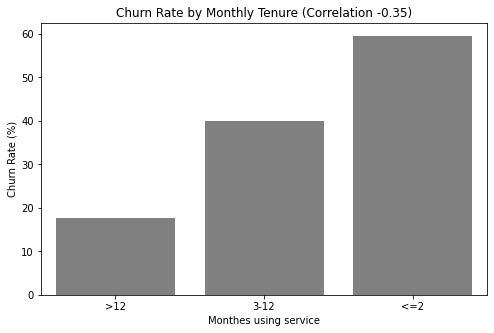

In [19]:
further_insights = df_train_full.copy() # I want to also check how correlation differs among self made bins in tenure column
def tenure_to_bin(x):
    if x <= 2:
        return '<=2'
    elif x <= 12:
        return '3-12'
    else:
        return '>12'

further_insights['months_bin'] = further_insights['tenure'].apply(tenure_to_bin)
result = (
    further_insights
    .groupby('months_bin')
    .agg(churn_rate=('churn', 'mean'))
    .assign(churn_rate=lambda x: x['churn_rate'] * 100)
    .reset_index()
)
display(result)

plt.figure(figsize=(8, 5))

sns.barplot(
    data=result.sort_values('churn_rate'),
    x='months_bin',
    y='churn_rate',color='grey'
)

plt.ylabel('Churn Rate (%)')
plt.xlabel('Monthes using service')
plt.title('Churn Rate by Monthly Tenure (Correlation -0.35)')

plt.show()

- The correlation between **tenure** and **churn** is **–0.35**. Since it is negative, the longer customers stay with the company, the less likely they are to churn.

- For customers who stay with the company for **two months or less**, the churn rate is **60%**.

- For customers with a tenure of **3 to 12 months**, the churn rate is **40%**.

- For customers who stay **longer than one year**, the churn rate is **17%**.

- Thus, the longer the contract duration, the lower the churn rate.


,monthly_charges_bin,churn_rate
0,50 Dollars and More,30.292927
1,<=20 Dollars,8.795411
2,Between 21 and 50 Dollars,22.258772


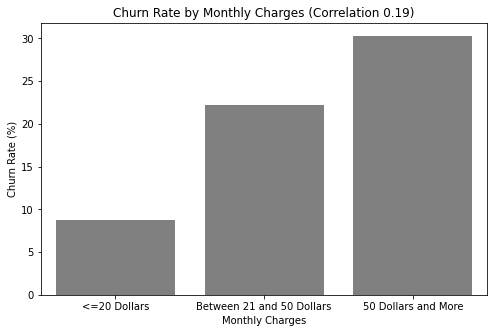

In [20]:
def monthly_charges_to_bin(x):
    if x <= 20:
        return '<=20 Dollars'
    elif x >= 21 and x <= 50:
        return 'Between 21 and 50 Dollars'
    else:
        return '50 Dollars and More'

further_insights['monthly_charges_bin'] = further_insights['monthlycharges'].apply(monthly_charges_to_bin)

result = (
    further_insights
    .groupby('monthly_charges_bin')
    .agg(churn_rate=('churn', 'mean'))
    .assign(churn_rate=lambda x: x['churn_rate'] * 100)
    .reset_index()
)

display(result)

plt.figure(figsize=(8, 5))

sns.barplot(
    data=result.sort_values('churn_rate'),
    x='monthly_charges_bin',
    y='churn_rate',color='grey'
)

plt.ylabel('Churn Rate (%)')
plt.xlabel('Monthly Charges')
plt.title('Churn Rate by Monthly Charges (Correlation 0.19)')

plt.show()

- The **monthlycharges** variable has a **positive correlation coefficient of 0.19**, which means that customers who pay more tend to churn more often.

- Only **8.8%** of customers who pay **less than $20 per month** churn.

- Customers who pay **between $21 and $50 per month** churn more frequently, with a churn rate of **22.3%**.

- Among customers who pay **more than $50 per month**, the churn rate reaches **30.8%**.


The **totalcharges** variable has a negative correlation with customer churn.

This is logical: the longer a customer stays with the company, the more they have paid in total.

Customers who have paid more are less likely to leave.

Therefore, the behavior of totalcharges is similar to the tenure variable.

At low values of totalcharges, the churn rate is high.

At high values, the churn rate is lower.

<a name = '3'></a>
## 3 - Feature Engineering 

We cannot simply take a categorical variable and put it directly into a machine learning model. Models can work only with numbers arranged in matrices. Therefore, we need to transform our categorical data into a matrix form, or **encode** it.

One such encoding method is **one-hot encoding**.


One-hot encoding in Scikit-learn can be done in several ways, but we will use **DictVectorizer**.  
As the name suggests, the function *vectorizes* the dictionary and then stack them as rows in a single matrix.

In [21]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')


In [22]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In this code, we create an instance of **DictVectorizer**, which we call `dv`, and “train” it by calling the `fit` method.  

This method examines the contents of the dictionaries and determines the possible values for each variable and how to map them  
to columns in the output matrix.  

If a feature is categorical, one-hot encoding is applied, but if the feature is numerical, it is left unchanged.


In [23]:
X_train = dv.transform(train_dict)
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

As we can see majority elements of the matrix are 0 and 1 these are categorical variables.  
However, we also see that there are three values that are not represented as 0 and 1 and they are our *numerical* variables.

In [24]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

Above we notice that for each categorical feature several new columns have been created. Each of the new column is created from unique values existing from original dataframe.  
`contract` now we get `contract=month-to-month`, `contract=one_year`, `contract=two_year`

<a name = '4'></a>
## 4 - ML for Classification Problem (Logistic Regression)

Logistic regression is also a linear model, but unlike linear regression, it is a **classification** model rather than a regression one,  
even though its name suggests otherwise.

It is a **binary classification** model, so the target variable \( y_i \)  is binary; the only values it can take are **0** and **1**.

Observations with \( y_i = 1 \) are usually called **positive examples**:  cases in which the effect we want to predict is present.  
Similarly, examples with \( y_i = 0 \) are called **negative examples**:  cases in which the predicted effect is absent.

For our project, \( y_i = 1 \) means that the customer has churned,  
and \( y_i = 0 \) means the opposite: the customer stayed with the company.

The output of logistic regression is the **probability** that an observation  \( x_i \) is positive — in other words, the probability that  
\( y_i = 1 \).  
In our case, this is the probability that customer *i* will terminate the contract.


In order to interpret the output results as probability we need to ensure that model's result will be between 0 and 1.  
For that matter we will use special mathematical function called **sigmoid** function


$$
g(x_i)=\operatorname{sigmoid}\!\left(w_0 + x_i^{T} w\right).
$$
$$
\operatorname{sigmoid}(x)=\sigma(x) = \frac{1}{1 + e^{-x}}


$$


If we compare the first formula with linear regression we notice that the only difference is that *sigmoid* function has been applied.
That's why both models are **linear** as they based on scalar multiplication.

*Sigmoid* function transforms any value to a number between **0** and **1**

<p align="left">
  <img src="https://miro.medium.com/1*muc-SoWYkLHKdsTGFiygxA.png " width="600">
</p>

If the feature vector \(x_i\) is \(n\)-dimensional, then the dot product can be expanded as

$$
g(x_i)=\operatorname{sigmoid}\left(w_0 + x_{i1}w_1 + x_{i2}w_2 + \dots + x_{in}w_n\right).
$$


<a name = '4.1'></a>
### 4.1 - Training Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1) 
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


Training take few seconds and after it is ready to make predictions. Let's check how well it performs.  
We can test on our validation frame.  For that we need to apply hot encoding for all categorical variables.

In [26]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

We have X_val matrix from validation data frame and we will use that matrix for our model. To get the probabilities we use `predict_proba` method.  
The method outputs two dimensional numpy array or two column matrix. First column contains probabilty that the target is negative client **will not churn**,  
The second column contains probability that it is positive client **will churn**.  

In [27]:
y_pred = model.predict_proba(X_val)


In [28]:
y_pred

array([[0.76508893, 0.23491107],
       [0.7311339 , 0.2688661 ],
       [0.6805482 , 0.3194518 ],
       ...,
       [0.94274725, 0.05725275],
       [0.38476961, 0.61523039],
       [0.93872737, 0.06127263]])

In [29]:
# Probability of churn is p and probability of not churn always equals 1-p.
# Therefore we don't need two columns

y_pred = model.predict_proba(X_val)[:,1]

As a result, we obtain a one-dimensional NumPy array that contains values only from the second column.

Such outputs (probabilities) are often called **soft predictions**. They express the probability of churn as a number between zero and one.

All that remains is to decide how to interpret this number.  
We will take 0.5 as a treshold value if some value is above that value we will address that clients with some ads or promotions in order to keep them.


In [30]:
churn = y_pred >= 0.5


By counting how many times our predictions match the actual values, we can use this metric to measure the quality of our model.  

This quality metric is called **accuracy**.


In [31]:
(y_val == churn).mean()

0.8016129032258065

After executing this line of code, we see `0.8` as the output. This means that the model’s predictions matched the actual values  
in 80% of the cases, or, in other words, the model makes correct predictions 80% of the time.

This is what we call the **model’s accuracy**.


In [32]:
# Bias
model.intercept_

array([-0.12198864])

In [33]:
# weights of the vectors
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))


{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


In order to undesrtand how model works let's create smaller model which will use only three variables `contract`, `tenure`, `totalcharges`.  
Let's repeat the previous steps but now with smaller number of features.

In [34]:
small_subset = ['contract', 'tenure', 'totalcharges'] 
train_dict_small = df_train[small_subset].to_dict(orient='records') 
dv_small = DictVectorizer(sparse=False) 
dv_small.fit(train_dict_small)
X_small_train = dv_small.transform(train_dict_small)

In [35]:
dv_small.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [36]:
model_small = LogisticRegression(solver='liblinear', random_state=1) 
model_small.fit(X_small_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


Model is ready now let's check the intercept-bias and weights it has learnt.

In [37]:
model_small.intercept_[0]

-0.577229912199359

In our case **base component - intercept** is negative 0.577 this number becomes 0.35 after applying sigmoid function.  
When looking at the graph of sigmoid function we also see that when negative number taken  as an input then the output is lower 0.5  
  
It means that without knowing any other information we expect the client will not churn. 

In [38]:

def sigmoid(score):
    return 1 / (1 + np.exp(-score))
sigmoid(model_small.intercept_[0])

0.35957023959632467

The reason why bias component is negative due to class disbalance, in training data are fewer clients who churn and more people who didn't churn.

In [39]:
dict(zip(dv_small.get_feature_names_out(),  model_small.coef_[0].round(3)))


{'contract=month-to-month': 0.866,
 'contract=one_year': -0.327,
 'contract=two_year': -1.117,
 'tenure': -0.094,
 'totalcharges': 0.001}

The interpretation of the signs of the weights for one-hot encoded features  
follows the same logic as the bias term.

If a weight is positive, the corresponding feature is an indicator of churn,  
and vice versa. If the weight is negative, it most likely corresponds to a  
customer who does **not** belong to the risk group.

Let us look again at the weights of the **contract** variable.  
The first weight for `contract=month-to-month` is positive, so customers with  
this type of contract are more likely to churn than to stay.

The other two features, `contract=one_year` and `contract=two_years`, have  
negative signs, which means that such customers are more likely to remain  
with the company.


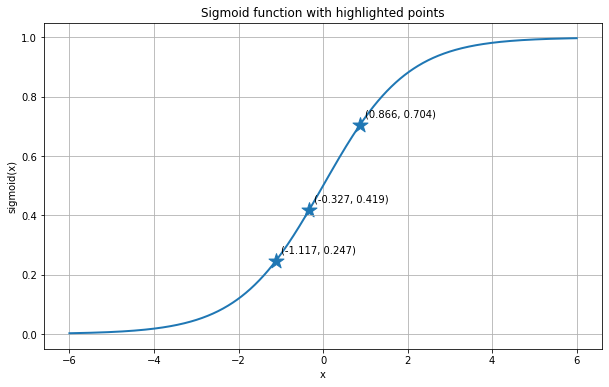

In [40]:
x_points = np.array([0.866, -0.327, -1.117])

x_curve = np.linspace(-6, 6, 800)
y_curve = sigmoid(x_curve)

y_points = sigmoid(x_points)

plt.figure(figsize=(10,6))
plt.plot(x_curve, y_curve, linewidth=2)
plt.scatter(x_points, y_points, marker='*', s=250) 
for x, y in zip(x_points, y_points):
    plt.annotate(f"({x:.3f}, {y:.3f})",
                 (x, y),
                 textcoords="offset points",
                 xytext=(5, 8))
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid function with highlighted points")
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.show()


In case of `two-year-contract` we can see that probability of terminating contract is about 0.25.  
While probability in group of `month-to-month` is around 0.70

,contract,risk_ratio
0,month-to-month,1.599082
1,one_year,0.446621
2,two_year,0.104730


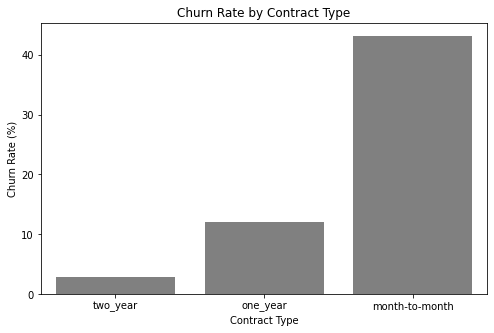

In [41]:

result = (
    df_train_full[['contract','churn']]
    .groupby('contract')
    .agg(churn_rate=('churn', 'mean'))
    .assign(churn_rate=lambda x: x['churn_rate'] * 100)
    .reset_index()
)


df_group = df_train_full.groupby('contract').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk_ratio'] = df_group['mean'] / global_churn
display(df_group.iloc[:,-1].reset_index())


plt.figure(figsize=(8, 5))

sns.barplot(
    data=result.sort_values('churn_rate'),
    x='contract',
    y='churn_rate',color='grey'
)

plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Type')
plt.title('Churn Rate by Contract Type')

plt.show()

Now let us turn to the numerical features. We have two of them: **tenure** and **totalcharges**.

The weight of the **tenure** feature is **–0.094**, and it has a negative sign.  
This means the same thing as before: the feature is an indicator of **no churn**.

From the feature importance analysis, we already know that the longer customers stay with us, the lower their probability of churn.  
The correlation between **tenure** and churn is **–0.35**, which is also a  
negative value.

The weight of this feature only confirms this: for each additional month that a customer stays with us, the overall score decreases by **0.094**.

The other numerical feature, **totalcharges**, has a zero weight. Since its weight is zero, regardless of the value of this feature, the model  
will not take it into account. Therefore, this feature is not actually important  
for making predictions.


Example we have a client with monthly contract and who has been with 1 year and paid in total 1000 USD.  
*1)* 
−0.639 (Bias) + 0.91 (Monthly Contract weight) − 12(months) · 0.094 (tenure weight) + 0 (totalcharges weight) · 1000 = −0.857  
  
  
The Second client has **one year contract** and he has been with us for **24** months  

*2)*  
−0.639 (Bias) + 0.144 (One Year Contract weight) − 24(months) · 0.094 (tenure weight) + 0 (totalcharges weight) · 2000 = −2.751  

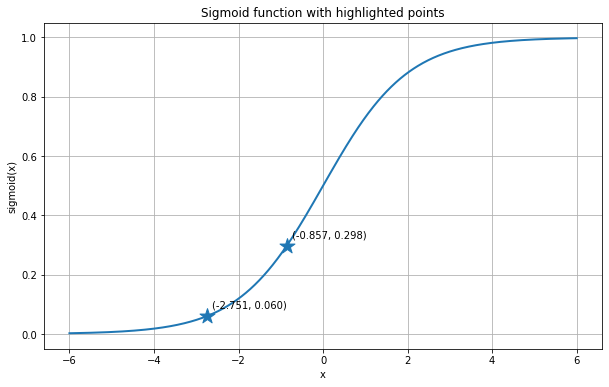

In [42]:
#let's illustrate these examples

x_points = np.array([-0.857,-2.751])

x_curve = np.linspace(-6, 6, 800)
y_curve = sigmoid(x_curve)

y_points = sigmoid(x_points)

plt.figure(figsize=(10,6))
plt.plot(x_curve, y_curve, linewidth=2)
plt.scatter(x_points, y_points, marker='*', s=250) 
for x, y in zip(x_points, y_points):
    plt.annotate(f"({x:.3f}, {y:.3f})",
                 (x, y),
                 textcoords="offset points",
                 xytext=(5, 8))
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid function with highlighted points")
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.show()


Probability of churn are 0.298 for the first example and 0.06 for the second example

<a name = '4.2'></a>
### 4.2 - Using Model


Let's check the model on new client

In [43]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [47]:
X_test = dv.transform([customer])
print(f"Probability of this client will churn: {round(model.predict_proba(X_test)[0,1],3)}")

Probability of this client will churn: 0.073


It is nearly 7.5% thus we will not send this client any ads or any other incentives to stay with the company.

In [48]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [50]:
X_test = dv.transform([customer]) 
model.predict_proba(X_test)[0, 1]
print(f"Probability of this client will churn: {round(model.predict_proba(X_test)[0,1],3)}")

Probability of this client will churn: 0.832


In the second case, we see that model predicts 0.832 or 83.2% probability the client will churn.  
Therefore, we will be sending him the promotion letter to keep him/her with us.  

## Summary

- **The risk of a categorical feature** tells us whether a group possessing this
  feature is likely to exhibit the modeled condition.  
  In the case of churn, values below **1.0** indicate low risk, while values above
  **1.0** indicate high risk.  
  This helps us identify which features are important for predicting the target
  variable and allows us to better understand the problem being solved.

- **Mutual information** allows us to measure the degree of (in)dependence between
  a categorical variable and the target.  
  It is a good way to find important features: the higher the mutual information,
  the more important the feature.

- **Correlation** measures the relationship between two numerical variables and
  can be used to determine whether a numerical feature is useful for predicting
  the target variable.

- **One-hot encoding** provides a way to represent categorical variables as numbers.  
  Without it, it would be impossible to easily use these variables in a model.  
  Machine learning models usually expect all input variables to be numerical, so
  having an encoding scheme is crucial if we want to use categorical features.

- We can implement **one-hot encoding** using **DictVectorizer** from Scikit-learn.  
  It automatically identifies categorical variables and applies one-hot encoding
  to them, while leaving numerical variables unchanged.  
  This is very convenient and does not require writing a large amount of code.

- **Logistic regression** is a linear model, just like linear regression.  
  The difference is that logistic regression has an additional step at the end:
  it applies the sigmoid function to transform scores into probabilities (numbers
  between zero and one).  
  This allows us to use it for classification.  
  The output is the probability of belonging to the positive class (in our case,
  churn).

- Once the data are prepared, training logistic regression is very simple:
  we use the **LogisticRegression** class from Scikit-learn and call the `fit`
  method.

- The model outputs **probabilities**, not hard predictions.  
  To convert these outputs into binary values, we apply a threshold to the
  predictions.  
  If the probability is greater than or equal to **0.5**, we predict **True**
  (churn); otherwise, we predict **False** (no churn).  
  This allows us to use the model to solve our task — predicting customer churn.
